In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from astropy.time import Time
from astropy.timeseries import TimeSeries
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from astropy.io import fits

In [ ]:
with fits.open('4U1626-2.lc') as hdul:
  hdul.info()
  time = hdul[1].data['TIME']
  data = hdul[1].data['RATE']

exposure = time[-1] - time[0]
print('\n Exposure (in sec)',exposure)

timeres = np.round(time[1] - time[0],3)
print('\n Time Resolution (in sec)',timeres)

Filename: 4U1626-2.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  RATE          1 BinTableHDU    100   7709R x 4C   [D, E, E, E]   
  2  STDGTI        1 BinTableHDU     48   31R x 2C   [1D, 1D]   

 Exposure (in sec) 963.5576072484255

 Time Resolution (in sec) 0.125


Text(0, 0.5, 'Count/s')

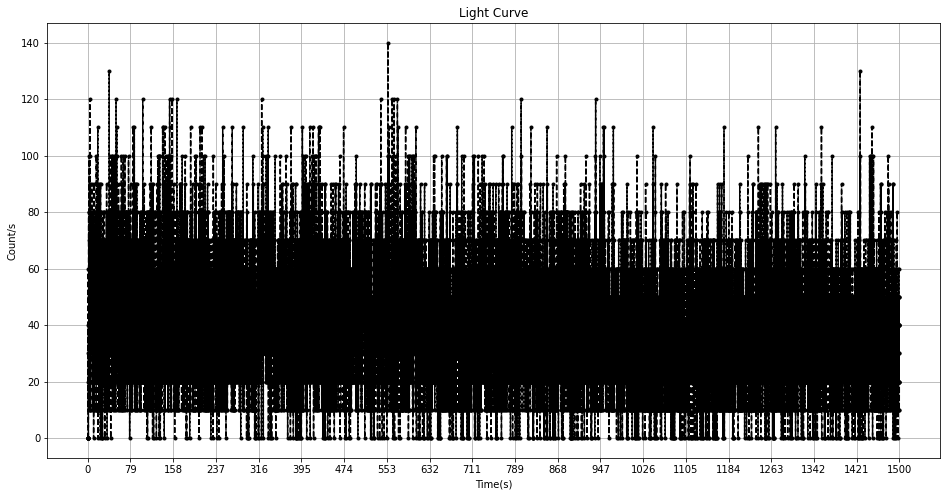

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(time,data,'.--',color ='black')
plt.title('Light Curve')
plt.grid()
plt.xticks(np.linspace(time[0],time[-1],20),fontsize = 10)
plt.xlabel('Time(s)')
plt.ylabel('Count/s')

In [ ]:
Newbin = 2
bins = np.arange(time[0],time[-1],Newbin)
digitized = np.digitize(time,bins)
abs_time_bin = [time[digitized == i].mean() for i in range(1,len(bins))]
un_time_bin = abs_time_bin - abs_time_bin[0]
un_data_bin = [data[digitized == i].mean() for i in range(1,len(bins))]

data_bin = [x for x in un_data_bin if str(x) != 'nan']
time_bin = [x for x in un_time_bin if str(x) != 'nan']


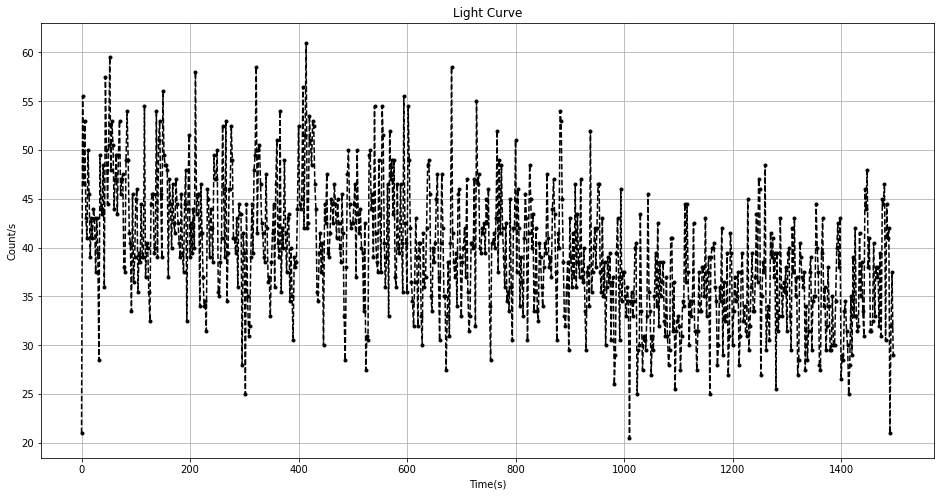

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(time_bin,data_bin,'.--',color ='black')
#plt.xticks(np.linspace(0,time[-1],20),fontsize=10)
#plt.xlim(3000,3500)
plt.xlabel('Time(s)')
plt.ylabel('Count/s')
plt.title('Light Curve')
plt.grid()

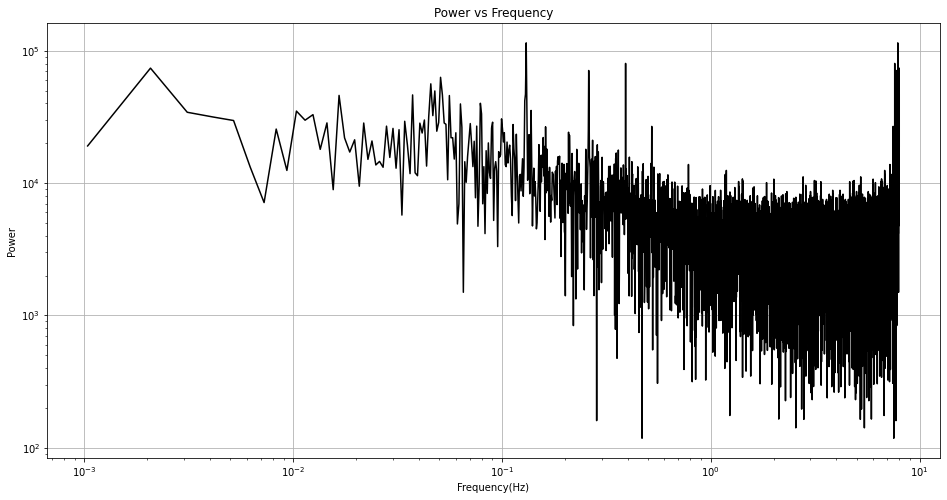

In [ ]:
fft = np.fft.fft(data)
power = []
for i in range(1,len(fft)):
  psd = abs(fft[i])
  power.append(psd)
N = len(data)


f = []
deltat = time[1] - time[0]

for k in range(1,N,1):
  f1 = k/(N*deltat)
  f.append(float(f1))

frequency = np.array(f)

plt.figure(figsize=(16,8))
plt.plot(frequency,power, color ='black')
#plt.xticks(np.linspace(0,frequency[-1]/2,20),fontsize=7)
#plt.xlim(0,frequency[-1]/2)
#plt.ylim(10000,10000000)
plt.yscale('log')
plt.xscale('log')
plt.title('Power vs Frequency')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Power')
plt.grid()

In [ ]:
#Change the file names for different pulsar and pulsar systems